## **Capstone Project**  ##

**Project Description :**

In this capstone project, the goal is to build a classifier that can classify the tickets by analysing
text.

**Business Domain Value:**

In the support process, incoming incidents are analyzed and assessed by organization’s
support teams to fulfill the request. In many organizations, better allocation and effective usage
of the valuable support resources will directly result in substantial cost savings.
Guided by powerful AI techniques that can classify incidents to right functional groups can
help organizations to reduce the resolving time of the issue and can focus on more productive
tasks.


In [0]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 36kB/s 
     |████████████████████████████████| 3.8MB 36.7MB/s 
     |████████████████████████████████| 450kB 67.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=69cd74586280d82a7fd68594649fcfb1e6edea66502836a9ed160e80d82d1cbd
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0


In [0]:
#Mount the Drive
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

#Importing Necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

from tqdm import tqdm
import time

import string
import nltk
import re
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet') 
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem.wordnet import WordNetLemmatizer


#Importing Sklearn function for splitting dataset for training and testing
from sklearn.model_selection  import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding,Bidirectional,Dense,Conv1D,Flatten,LSTM,GlobalMaxPooling1D,Dropout

from sklearn.manifold import TSNE
import tensorflow as tf
# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Using TensorFlow backend.


**Exploring the given Data files**

In [0]:
#Load Dataset from drive
data = pd.read_excel("/content/drive/My Drive/Dataset.xlsx")


In [0]:
#Have a look at first five rows in dataset
data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


**Understanding the structure of data**

In [0]:
#number of rows and columns
rows , columns = data.shape
print("Number of Rows in Given Dataset:", rows)
print("Number of Columns in Given Dataset:" ,columns)

Number of Rows in Given Dataset: 8500
Number of Columns in Given Dataset: 4


**There are 8500 observations and 4 features**

In [0]:
#Datatypes of each attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


**All the 4 attributes are of object type**




**Missing points in data:**

In [0]:
data.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

**Description - There are null values in 'Short description' and 'Description'**

**Dealing with missing values**

In [0]:
# filling NA's with no_info
data.fillna("the",inplace=True)

In [0]:
data.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [0]:


#Dropping the column Caller as it is insignificant for our model
df = data.drop(['Caller'],axis = 1)


**Finding inconsistencies in the data:**


**Merge the short description and description column using concat**

In [0]:
df['DESCRIPTION'] =  df['Short description'].str.cat(df['Description'], sep =" ") 

#Drop the old columns
df_final = df.drop(['Short description','Description'],axis = 1)

#Rename the column assignment group  to target
df_final = df_final.rename(columns = {'Assignment group':'target'}) 

df_final.head()

,target,DESCRIPTION
0,GRP_0,login issue -verified user details.(employee# ...
1,GRP_0,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...
2,GRP_0,cant log in to vpn \r\n\r\nreceived from: eylq...
3,GRP_0,unable to access hr_tool page unable to access...
4,GRP_0,skype error skype error


In [0]:
df_final['target'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [0]:
df_final['target'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_70       1
GRP_73       1
GRP_35       1
GRP_61       1
GRP_64       1
Name: target, Length: 74, dtype: int64

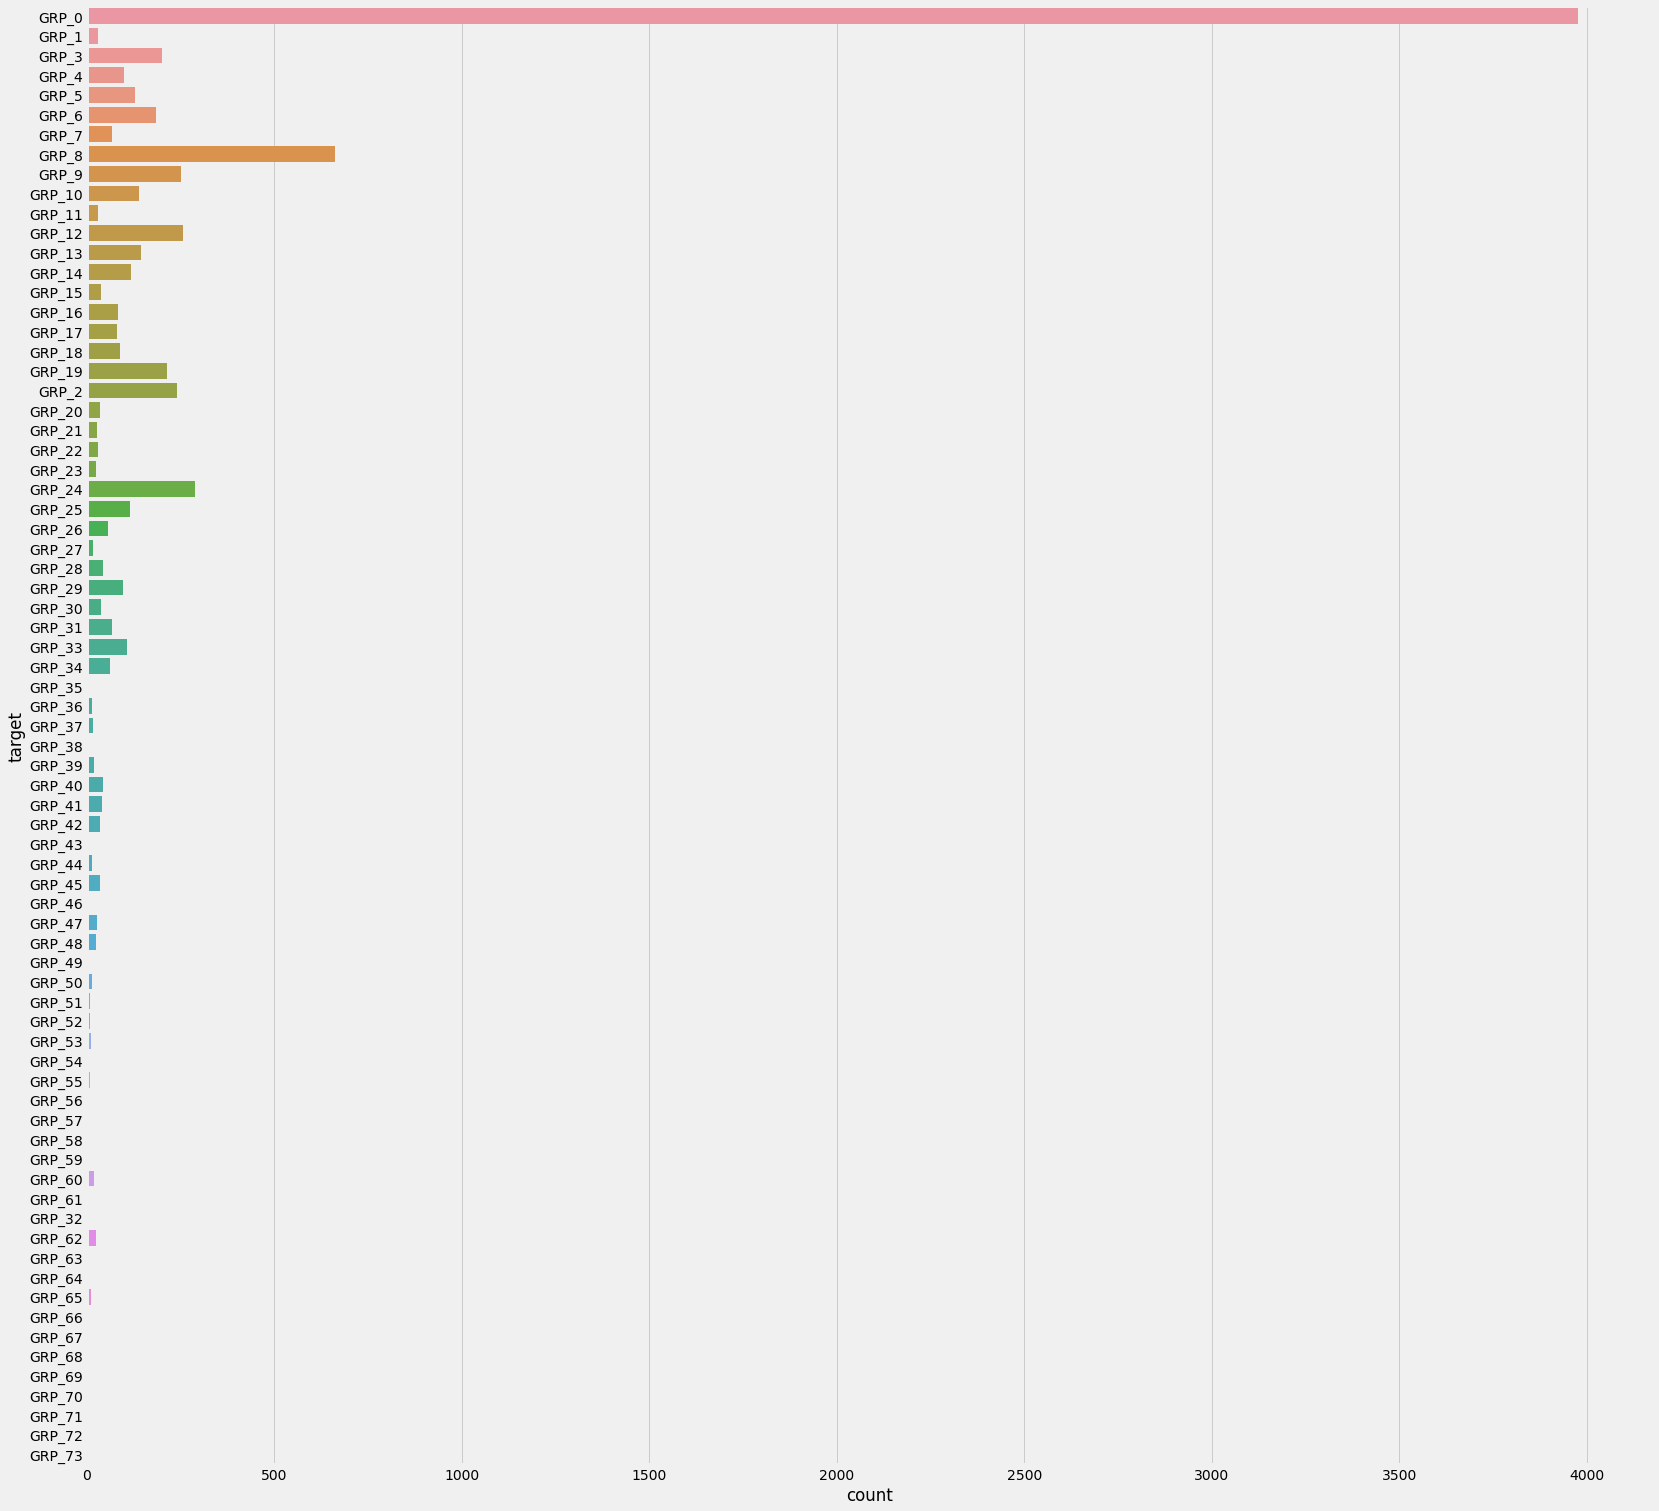

In [0]:
#Now let's plot the Assignment group(target) after replacing the null values
group=df_final['target']
plt.figure(figsize=(25,25))
sns.countplot(y=group)
plt.show()

**Description: From the above output we can clearly seen that this is a class imbalance problem as majority of data belongs to GRP_0**






**Visualizing different patterns Before Preprocessing And Text cleaning :**

**Word Cloud before cleaning the text:**







In [0]:
##Creating a list of stop words 
stop_words = set(stopwords.words("english"))

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stop_words,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

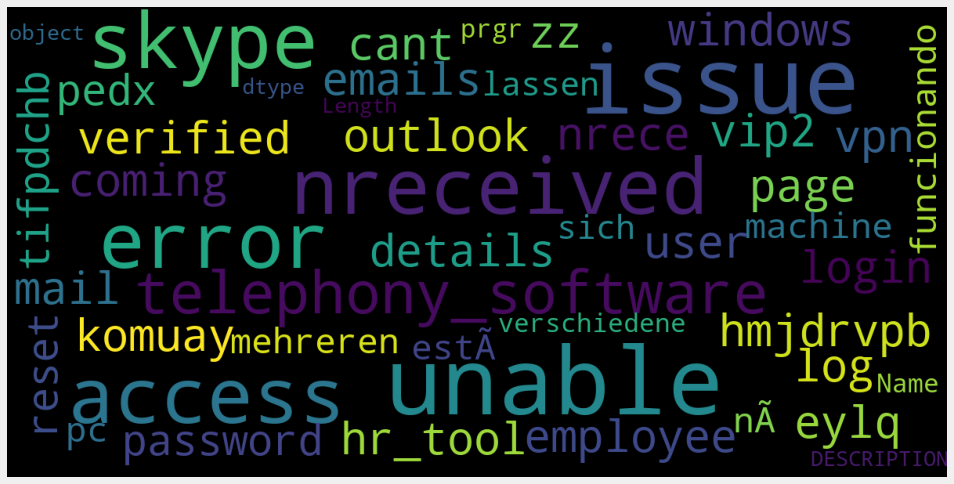

In [0]:
#Word cloud distribution of "Short description"  before cleaning
show_wordcloud(df_final["DESCRIPTION"])

In [0]:
#Fetch wordcount for each entry in description
df_final['word_count_short_dec'] = df_final['DESCRIPTION'].apply(lambda x: len(str(x).split(" ")))
df_final[['DESCRIPTION','word_count_short_dec']].head()

,DESCRIPTION,word_count_short_dec
0,login issue -verified user details.(employee# ...,31
1,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,24
2,cant log in to vpn \r\n\r\nreceived from: eylq...,14
3,unable to access hr_tool page unable to access...,10
4,skype error skype error,6


**Text preprocessing : Cleaning**

In [0]:

#Data Cleaning for Description column
corpus = []
for i in range(0, 8500):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', str(df_final['DESCRIPTION'][i]))
    text = re.sub(r"[!\"#$%&\'()*+,-./:;<=>?@^_`{|}~\[\]]"," ",text) # removing all punctuations
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.:-_*?&gt;@"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    text = re.sub(r"[0-9]","",text) # removing numbers
    
    ##Convert to list from string
    text = text.split()
    

    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [0]:
corpus[1]

'outlook received hmjdrvpb komuaywn gmail com hello team meeting skype meeting etc appearing outlook calendar somebody please advise correct kind'

**Word cloud for Description cloumn after cleaning**



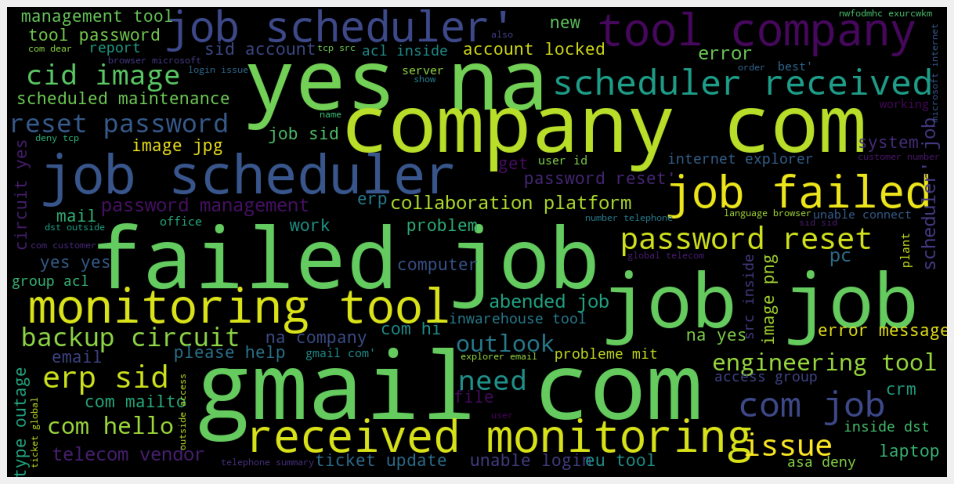

In [0]:
show_wordcloud(corpus)

**Visualizing different text features :**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [0]:
list(cv.vocabulary_.keys())[:10]

['login',
 'issue',
 'verified',
 'user',
 'detail',
 'employee',
 'manager',
 'name',
 'checked',
 'ad']

In [0]:
from nltk.probability import FreqDist
text = str(corpus)
fdist = FreqDist()
for word in word_tokenize(text):
    fdist[word.lower()] += 1
fdist.most_common(50)

[("'", 8547),
 (',', 8499),
 ('job', 4280),
 ('com', 3804),
 ('tool', 2838),
 ('company', 2748),
 ('password', 2381),
 ('received', 2373),
 ('gmail', 2205),
 ('please', 2065),
 ('yes', 2027),
 ('na', 2008),
 ('scheduler', 1928),
 ('failed', 1734),
 ('sid', 1689),
 ('erp', 1652),
 ('user', 1602),
 ('issue', 1471),
 ('e', 1368),
 ('reset', 1356),
 ('access', 1356),
 ('f', 1321),
 ('account', 1118),
 ('ticket', 1064),
 ('email', 1027),
 ('error', 1019),
 ('monitoring', 996),
 ('c', 924),
 ('unable', 859),
 ('working', 852),
 ('hostname', 851),
 ('site', 834),
 ("'job", 817),
 ('login', 804),
 ('system', 800),
 ('need', 788),
 ('outlook', 770),
 ('help', 764),
 ('name', 741),
 ('id', 704),
 ('b', 659),
 ('power', 655),
 ('circuit', 642),
 ("'unable", 639),
 ('x', 638),
 ('hello', 634),
 ('locked', 612),
 ('vendor', 604),
 ('network', 592),
 ('update', 582)]

[Text(0, 0, 'job'),
 Text(0, 0, 'com'),
 Text(0, 0, 'tool'),
 Text(0, 0, 'company'),
 Text(0, 0, 'password'),
 Text(0, 0, 'received'),
 Text(0, 0, 'gmail'),
 Text(0, 0, 'please'),
 Text(0, 0, 'erp'),
 Text(0, 0, 'yes'),
 Text(0, 0, 'na'),
 Text(0, 0, 'scheduler'),
 Text(0, 0, 'failed'),
 Text(0, 0, 'sid'),
 Text(0, 0, 'user'),
 Text(0, 0, 'reset'),
 Text(0, 0, 'issue'),
 Text(0, 0, 'unable'),
 Text(0, 0, 'access'),
 Text(0, 0, 'account')]

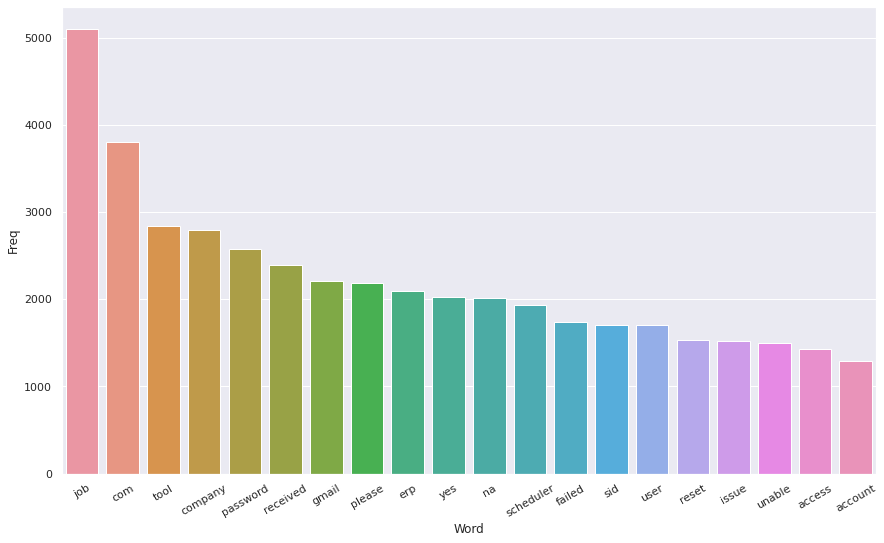

In [0]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                Bi-gram  Freq
0             gmail com  2205
1         job scheduler  1928
2            failed job  1614
3                yes na  1570
4           company com  1429
5               job job  1265
6       monitoring tool   989
7          tool company   976
8   received monitoring   961
9            job failed   948
10   scheduler received   803
11              com job   786
12       password reset   785
13              erp sid   583
14            cid image   478
15     engineering tool   450
16       backup circuit   441
17       reset password   439
18            com hello   401
19       account locked   398


[Text(0, 0, 'gmail com'),
 Text(0, 0, 'job scheduler'),
 Text(0, 0, 'failed job'),
 Text(0, 0, 'yes na'),
 Text(0, 0, 'company com'),
 Text(0, 0, 'job job'),
 Text(0, 0, 'monitoring tool'),
 Text(0, 0, 'tool company'),
 Text(0, 0, 'received monitoring'),
 Text(0, 0, 'job failed'),
 Text(0, 0, 'scheduler received'),
 Text(0, 0, 'com job'),
 Text(0, 0, 'password reset'),
 Text(0, 0, 'erp sid'),
 Text(0, 0, 'cid image'),
 Text(0, 0, 'engineering tool'),
 Text(0, 0, 'backup circuit'),
 Text(0, 0, 'reset password'),
 Text(0, 0, 'com hello'),
 Text(0, 0, 'account locked')]

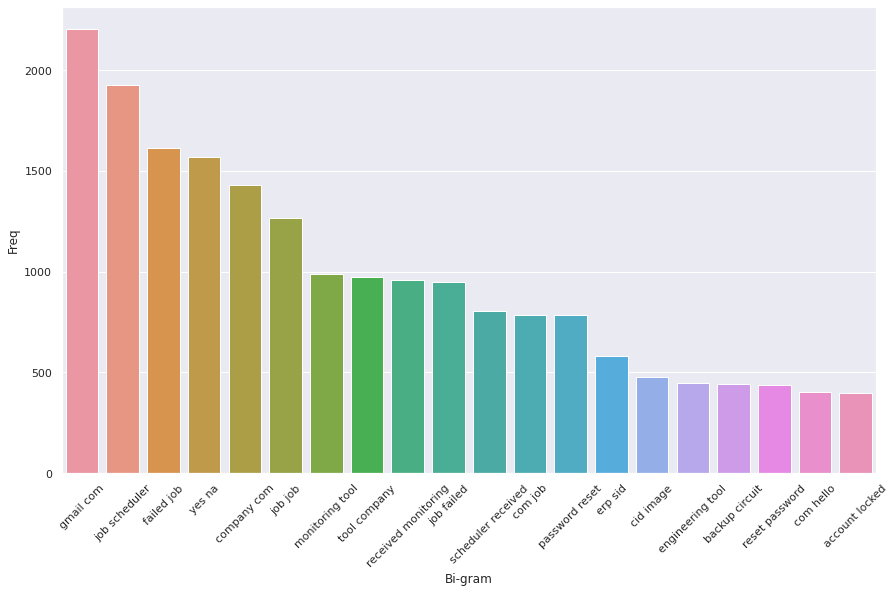

In [0]:

#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                         Tri-gram  Freq
0            failed job scheduler  1614
1                tool company com   962
2        received monitoring tool   961
3         monitoring tool company   961
4                  job failed job   946
5                  job job failed   945
6          job scheduler received   803
7   scheduler received monitoring   803
8                 company com job   785
9                     com job job   468
10                gmail com hello   379
11       password management tool   311
12              job job scheduler   300
13                abended job job   298
14                 yes na company   285
15                      na yes na   285
16                  cid image png   270
17             backup circuit yes   242
18                     yes yes na   231
19                erp sid account   213


[Text(0, 0, 'failed job scheduler'),
 Text(0, 0, 'tool company com'),
 Text(0, 0, 'received monitoring tool'),
 Text(0, 0, 'monitoring tool company'),
 Text(0, 0, 'job failed job'),
 Text(0, 0, 'job job failed'),
 Text(0, 0, 'job scheduler received'),
 Text(0, 0, 'scheduler received monitoring'),
 Text(0, 0, 'company com job'),
 Text(0, 0, 'com job job'),
 Text(0, 0, 'gmail com hello'),
 Text(0, 0, 'password management tool'),
 Text(0, 0, 'job job scheduler'),
 Text(0, 0, 'abended job job'),
 Text(0, 0, 'yes na company'),
 Text(0, 0, 'na yes na'),
 Text(0, 0, 'cid image png'),
 Text(0, 0, 'backup circuit yes'),
 Text(0, 0, 'yes yes na'),
 Text(0, 0, 'erp sid account')]

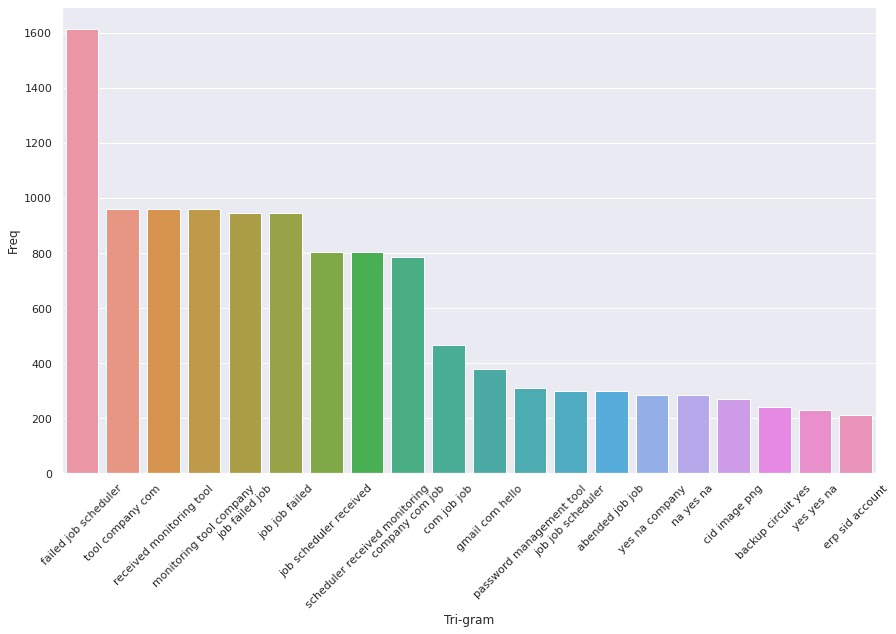

In [0]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

**Checking the max length of description column:**

In [0]:
df_cleaned_text = pd.DataFrame(df_final)
df_cleaned_text['full_description'] = corpus
df_cleaned_text = df_cleaned_text.drop(['DESCRIPTION','word_count_short_dec'],axis = 1)
df_cleaned_text.head()

,target,full_description
0,GRP_0,login issue verified user detail employee mana...
1,GRP_0,outlook received hmjdrvpb komuaywn gmail com h...
2,GRP_0,cant log vpn received eylqgodm ybqkwiam gmail ...
3,GRP_0,unable access hr tool page unable access hr to...
4,GRP_0,skype error skype error


In [0]:
#Fetch wordcount for each entry in full description
df_cleaned_text['word_count_'] = df_final['full_description'].apply(lambda x: len(str(x).split(" ")))
df_cleaned_text[['full_description','word_count_']].head()

,full_description,word_count_
0,login issue verified user detail employee mana...,24
1,outlook received hmjdrvpb komuaywn gmail com h...,20
2,cant log vpn received eylqgodm ybqkwiam gmail ...,13
3,unable access hr tool page unable access hr to...,10
4,skype error skype error,4


In [0]:
df_cleaned_text.word_count_.describe()

count    8500.000000
mean       25.228353
std        48.021836
min         1.000000
25%        10.000000
50%        16.000000
75%        26.000000
max      1264.000000
Name: word_count_, dtype: float64

**Description : As we can see from the above output the average word count is about 25 words per description and maximum word length is 1264 so our max_len parameter will be set to 1264**

In [0]:
max_len = 1264

**Coverting Target column into label Encoding**

---

In [0]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Target'. 
df_cleaned_text['target']= label_encoder.fit_transform(df_cleaned_text['target']) 
  
df_cleaned_text['target'].unique() 

array([ 0,  1, 23, 34, 45, 56, 67, 72, 73,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 27, 28,
       29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47,
       48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 26, 59, 60, 61, 62, 63, 64,
       65, 66, 68, 69, 70, 71])

**Creating tokens as required**

In [0]:
MAX_SEQUENCE_LENGTH = max_len
MAX_NB_WORDS = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2

In [0]:
sentences = df_cleaned_text['full_description']
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(sentences) #.values)
sequence = tokenizer.texts_to_sequences(sentences) #df_cleaned_text['full_description'].values)

word_index = tokenizer.word_index
print('Number of Unique Tokens',len(word_index))


Number of Unique Tokens 14596


In [0]:
padded_seq = pad_sequences(sequence , maxlen = max_len )

padded_seq

array([[   0,    0,    0, ...,   32,   17,  283],
       [   0,    0,    0, ...,  346,  367,  424],
       [   0,    0,    0, ...,   67,   50,   99],
       ...,
       [   0,    0,    0, ...,   16, 8783, 8784],
       [   0,    0,    0, ..., 7048,  412,   40],
       [   0,    0,    0, ..., 1093, 3699, 3170]], dtype=int32)

In [0]:

target_class  = df_cleaned_text['target'].unique() 

print("The Number of Samples in the dataset: ", len(df_final)) 
for i in target_class :
  print('Group',i , ':', round(df_final['target'].value_counts()[i] /len(df_final) * 100, 2), '% of the dataset') 


The Number of Samples in the dataset:  8500
Group 0 : 46.78 % of the dataset
Group 1 : 7.78 % of the dataset
Group 23 : 0.66 % of the dataset
Group 34 : 0.35 % of the dataset
Group 45 : 0.18 % of the dataset
Group 56 : 0.05 % of the dataset
Group 67 : 0.02 % of the dataset
Group 72 : 0.01 % of the dataset
Group 73 : 0.01 % of the dataset
Group 2 : 3.4 % of the dataset
Group 3 : 3.02 % of the dataset
Group 4 : 2.96 % of the dataset
Group 5 : 2.84 % of the dataset
Group 6 : 2.53 % of the dataset
Group 7 : 2.35 % of the dataset
Group 8 : 2.16 % of the dataset
Group 9 : 1.71 % of the dataset
Group 10 : 1.65 % of the dataset
Group 11 : 1.52 % of the dataset
Group 12 : 1.39 % of the dataset
Group 13 : 1.36 % of the dataset
Group 14 : 1.26 % of the dataset
Group 15 : 1.18 % of the dataset
Group 16 : 1.14 % of the dataset
Group 17 : 1.04 % of the dataset
Group 18 : 1.0 % of the dataset
Group 19 : 0.95 % of the dataset
Group 20 : 0.81 % of the dataset
Group 21 : 0.8 % of the dataset
Group 22 : 

In [0]:
from keras.utils import to_categorical
Y_data = np.array(df_cleaned_text['target']).reshape(-1,1)
X_data = padded_seq
ros = RandomOverSampler(random_state = 42) 
  
X_res, y_res = ros.fit_resample(X_data, Y_data) 
   
X_res = pd.DataFrame(X_res) 
Y_res = pd.DataFrame(y_res) 
   

In [0]:

#Data After Resampling
label_class  = df_cleaned_text['target'].unique() 


print("After Over Sampling Of Minor Class Total Samples are :", len(Y_res)) 

for i in label_class :
  print('Group',i , ':', round(Y_res[0].value_counts()[i] /len(Y_res) * 100, 2), '% of the dataset') 


#print('Class 0        :', round(Y_res[0].value_counts()[0] 
                #/len(Y_res) * 100, 2), '% of the dataset') 
   
#print('Class 1(Fraud) :', round(Y_res[0].value_counts()[1] 
                #/len(Y_res) * 100, 2), '% of the dataset') 

After Over Sampling Of Minor Class Total Samples are : 294224
Group 0 : 1.35 % of the dataset
Group 1 : 1.35 % of the dataset
Group 23 : 1.35 % of the dataset
Group 34 : 1.35 % of the dataset
Group 45 : 1.35 % of the dataset
Group 56 : 1.35 % of the dataset
Group 67 : 1.35 % of the dataset
Group 72 : 1.35 % of the dataset
Group 73 : 1.35 % of the dataset
Group 2 : 1.35 % of the dataset
Group 3 : 1.35 % of the dataset
Group 4 : 1.35 % of the dataset
Group 5 : 1.35 % of the dataset
Group 6 : 1.35 % of the dataset
Group 7 : 1.35 % of the dataset
Group 8 : 1.35 % of the dataset
Group 9 : 1.35 % of the dataset
Group 10 : 1.35 % of the dataset
Group 11 : 1.35 % of the dataset
Group 12 : 1.35 % of the dataset
Group 13 : 1.35 % of the dataset
Group 14 : 1.35 % of the dataset
Group 15 : 1.35 % of the dataset
Group 16 : 1.35 % of the dataset
Group 17 : 1.35 % of the dataset
Group 18 : 1.35 % of the dataset
Group 19 : 1.35 % of the dataset
Group 20 : 1.35 % of the dataset
Group 21 : 1.35 % of the

In [0]:
from keras.utils import to_categorical
labels =  to_categorical(np.asarray(y_res))

X_train, X_test, y_train, y_test = train_test_split(X_res, labels, random_state = 0) 
  

In [0]:
X_train.shape , y_train.shape

((220668, 1264), (220668, 74))

In [0]:

# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (220668, 1264)
Number transactions y_train dataset:  (220668, 74)
Number transactions X_test dataset:  (73556, 1264)
Number transactions y_test dataset:  (73556, 74)


**Importing the Glove embedding for the word embedding**

In [0]:
glove_file = "/content/drive/My Drive/glove.6B.zip"
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

In [0]:
embeddings_index = {}
f = open('/content/glove.6B.100d.txt',encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Total %s word vectors in Glove 6B 100d.' % len(embeddings_index))

Total 400001 word vectors in Glove 6B 100d.


In [0]:
#checking the value for login in embedding index
embeddings_index['login']

array([-0.90907 ,  0.29594 ,  0.1473  , -0.41327 ,  0.054759, -0.10592 ,
       -0.59419 ,  0.21344 ,  0.94355 , -0.28571 ,  0.21469 ,  0.33079 ,
        0.44375 , -0.30282 , -0.080723,  0.16201 ,  1.0703  , -0.66267 ,
       -0.10595 , -0.068358, -0.99958 , -0.92376 , -0.059927,  0.36211 ,
       -0.38552 , -0.89266 ,  0.12297 ,  0.8144  ,  0.064704, -0.492   ,
        0.67006 ,  0.80839 ,  0.45485 , -0.18486 ,  0.78549 , -0.37607 ,
       -0.86583 , -0.31026 ,  0.12632 , -0.20537 ,  0.6703  , -0.51899 ,
        0.31974 ,  0.20362 , -0.51707 ,  0.65196 , -0.71614 , -0.33318 ,
        0.023626,  0.018663,  0.26647 ,  0.52255 , -0.020652,  0.62328 ,
        0.1374  , -0.040994,  0.18668 , -0.35269 , -0.33691 , -0.12065 ,
       -0.49665 ,  0.22225 , -0.45156 ,  0.81232 ,  0.48352 , -0.40804 ,
       -0.2321  , -0.87179 ,  0.44785 , -0.34731 , -0.71127 ,  0.48481 ,
        0.7532  , -0.70953 , -0.79626 ,  0.88131 , -1.0639  , -0.51368 ,
        0.28329 , -0.49795 ,  0.37716 , -0.18027 , 

In [0]:
embedding_matrix1 = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix1[i] = embedding_vector

In [0]:
embedding_matrix1.shape

(14597, 100)

In [0]:
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))

tokens = []
labels = []

for word,i in word_index.items():
    temp = embeddings_index.get(word)
    if temp is not None:
        embedding_matrix[i] = temp
        
#for plotting
        tokens.append(embedding_matrix[i])
        labels.append(word)


In [0]:
embedding_matrix.shape


(14597, 100)

(200, 2)


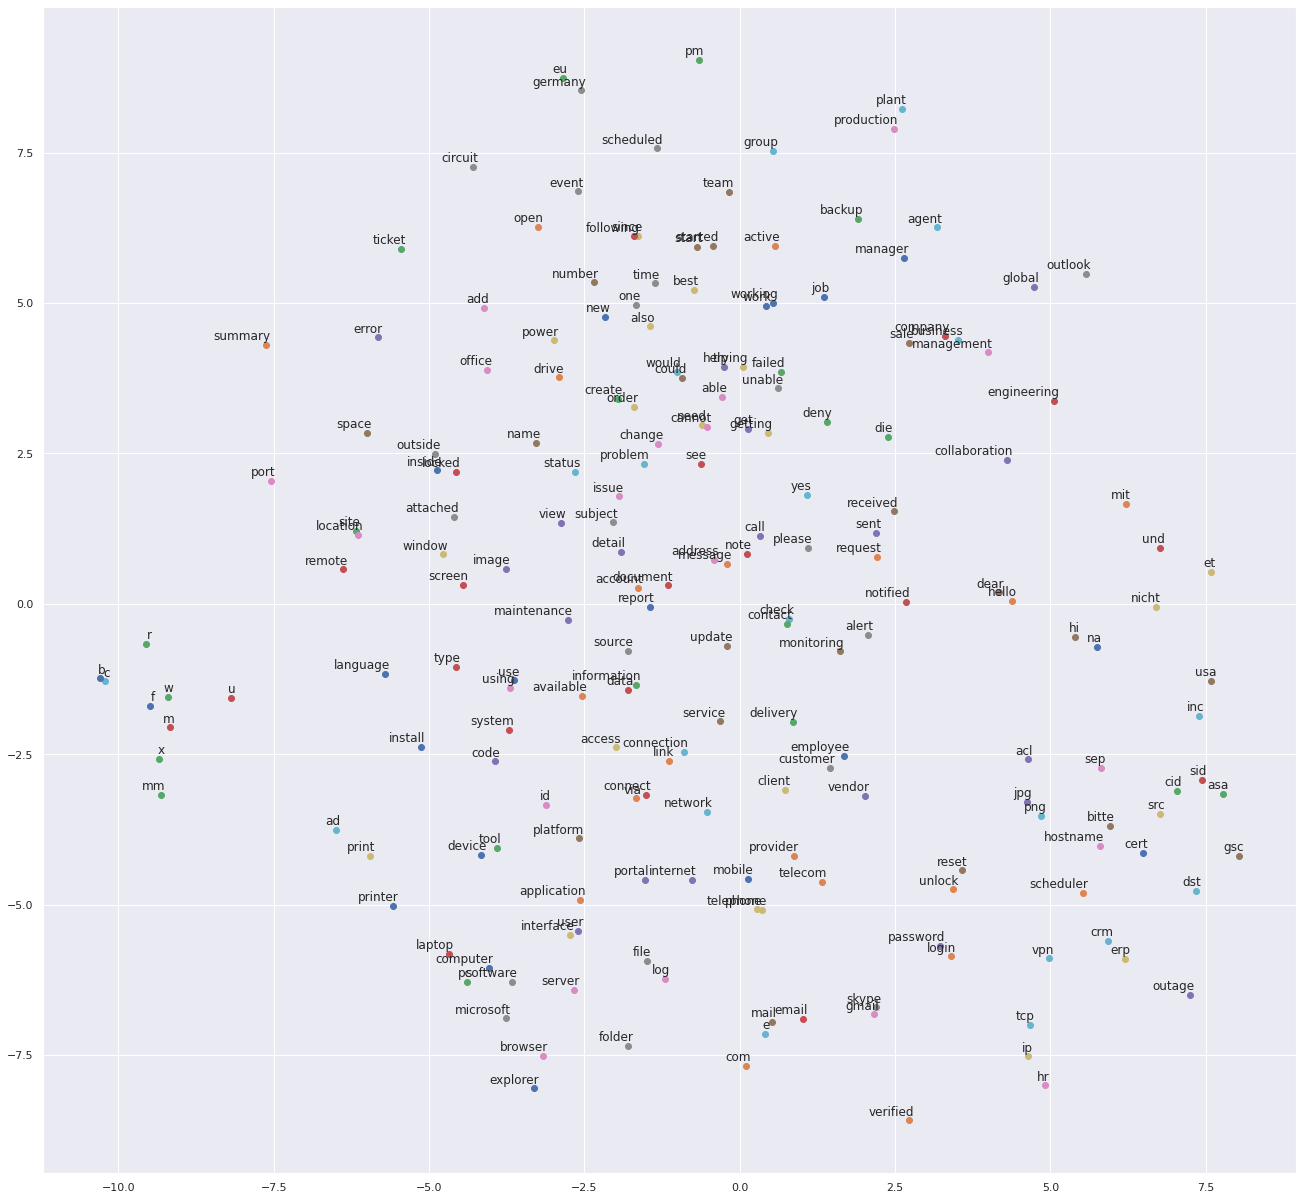

In [0]:
#TSNE algorithm used to visualize word embeddings having huge amount (100) dimensions

def tsne():
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens[:200])
    print(new_values.shape)
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20,20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

    
    
    
    
tsne()

**Description:**

In [0]:


from keras.callbacks import ModelCheckpoint
#from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Embedding,Bidirectional,Dense,Conv1D,Flatten,LSTM,GlobalMaxPooling1D,Dropout

In [0]:
#Embedding layer before the actaul BLSTM 
#MAX_SEQUENCE_LENGTH = max_len,MAX_NB_WORDS = 20000,EMBEDDING_DIM = 100 VALIDATION_SPLIT = 0.2
embedd_layer = Embedding(len(word_index) + 1 , EMBEDDING_DIM , input_length = MAX_SEQUENCE_LENGTH, weights = [embedding_matrix])

In [0]:

model = Sequential()
model.add(embedd_layer)
model.add(Bidirectional(LSTM(128, return_sequences = True , dropout = 0.1 , recurrent_dropout = 0.1)))
model.add(GlobalMaxPooling1D())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(74,activation = 'sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1264, 100)         1459700   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 1264, 256)         234496    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 74)                4810      
Total params: 1,715,454
Trainable params: 1,715,454
Non-trainable params: 0
____________________________________________

In [0]:
from keras.models import model_from_json
def load():
    load_json = open("weights.json",'r')
    loaded = load_json.read()
    load_json.close()
    load = model_from_json(loaded)
    load.load_weights("model.h5")
    print("Loaded")
    model = load

In [0]:

from keras.optimizers import Adam
add = Adam(lr = 0.01)
model.compile(loss = 'categorical_crossentropy' , optimizer = add , metrics = ['accuracy'])

In [0]:
hist = model.fit(X_train,y_train,epochs = 5, batch_size = 500, validation_data = (X_test,y_test))


Train on 220668 samples, validate on 73556 samples
Epoch 1/5
220668/220668 [==============================] - 1846s 8ms/step - loss: 0.4870 - accuracy: 0.8657 - val_loss: 0.1337 - val_accuracy: 0.9519
Epoch 2/5
220668/220668 [==============================] - 1848s 8ms/step - loss: 0.1429 - accuracy: 0.9499 - val_loss: 0.1311 - val_accuracy: 0.9529
Epoch 3/5
220668/220668 [==============================] - 1845s 8ms/step - loss: 0.1325 - accuracy: 0.9521 - val_loss: 0.1278 - val_accuracy: 0.9544
Epoch 4/5
220668/220668 [==============================] - 1842s 8ms/step - loss: 0.1341 - accuracy: 0.9516 - val_loss: 0.1316 - val_accuracy: 0.9526
Epoch 5/5
220668/220668 [==============================] - 1933s 9ms/step - loss: 0.1368 - accuracy: 0.9504 - val_loss: 0.1316 - val_accuracy: 0.9526


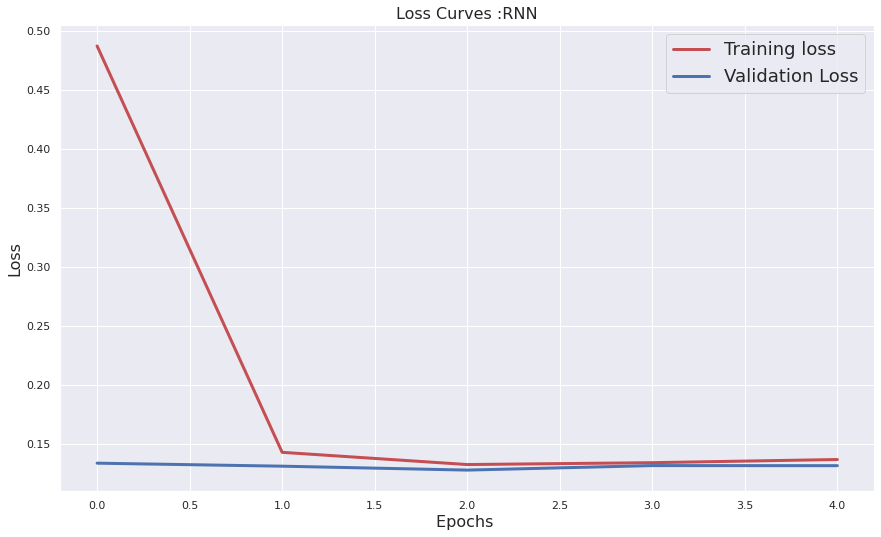

In [0]:


fig1 = plt.figure()
plt.plot(hist.history['loss'],'r',linewidth=3.0)
plt.plot(hist.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves :RNN',fontsize=16)
fig1.savefig('loss_rnn.png')
plt.show()

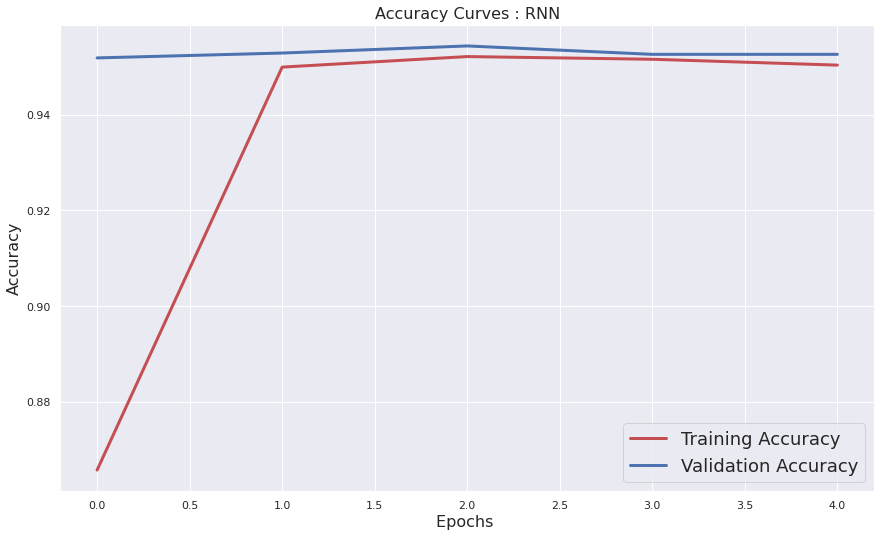

In [0]:

fig2=plt.figure()
plt.plot(hist.history['accuracy'],'r',linewidth=3.0)
plt.plot(hist.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves : RNN',fontsize=16)
fig2.savefig('accuracy_rnn.png')
plt.show()

In [0]:
score , acc = model.evaluate(X_test,y_test,batch_size = 500 , verbose = 2)
print("Test Accuracy : " ,acc)

Test Accuracy :  0.9526075124740601


In [0]:
    predicted = model.predict(X_test)

In [0]:
from sklearn import metrics
true_labels = np.argmax(y_test, axis=1)
#true_labels[2]
print(metrics.confusion_matrix(true_labels, predicted))

[[ 753    0    0 ...    0    2    3]
 [   0  983    0 ...    0    0    0]
 [   0    0  823 ...    0    0    0]
 ...
 [   0    0    0 ... 1021    0    0]
 [   0   16    2 ...    0  487    0]
 [   0    0    0 ...    0    0  350]]


In [0]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, predicted))

              precision    recall  f1-score   support

           0       0.99      0.75      0.86       998
           1       0.88      1.00      0.94       983
           2       1.00      0.82      0.90      1003
           3       1.00      1.00      1.00       994
           4       0.99      0.96      0.97       998
           5       1.00      0.97      0.98       978
           6       0.99      0.99      0.99       980
           7       0.99      1.00      0.99      1041
           8       0.99      1.00      1.00      1005
           9       1.00      1.00      1.00      1002
          10       1.00      0.97      0.98      1022
          11       0.98      0.99      0.98       981
          12       0.99      0.98      0.99      1003
          13       1.00      1.00      1.00      1015
          14       1.00      1.00      1.00       987
          15       1.00      1.00      1.00      1001
          16       1.00      1.00      1.00       952
          17       1.00    

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

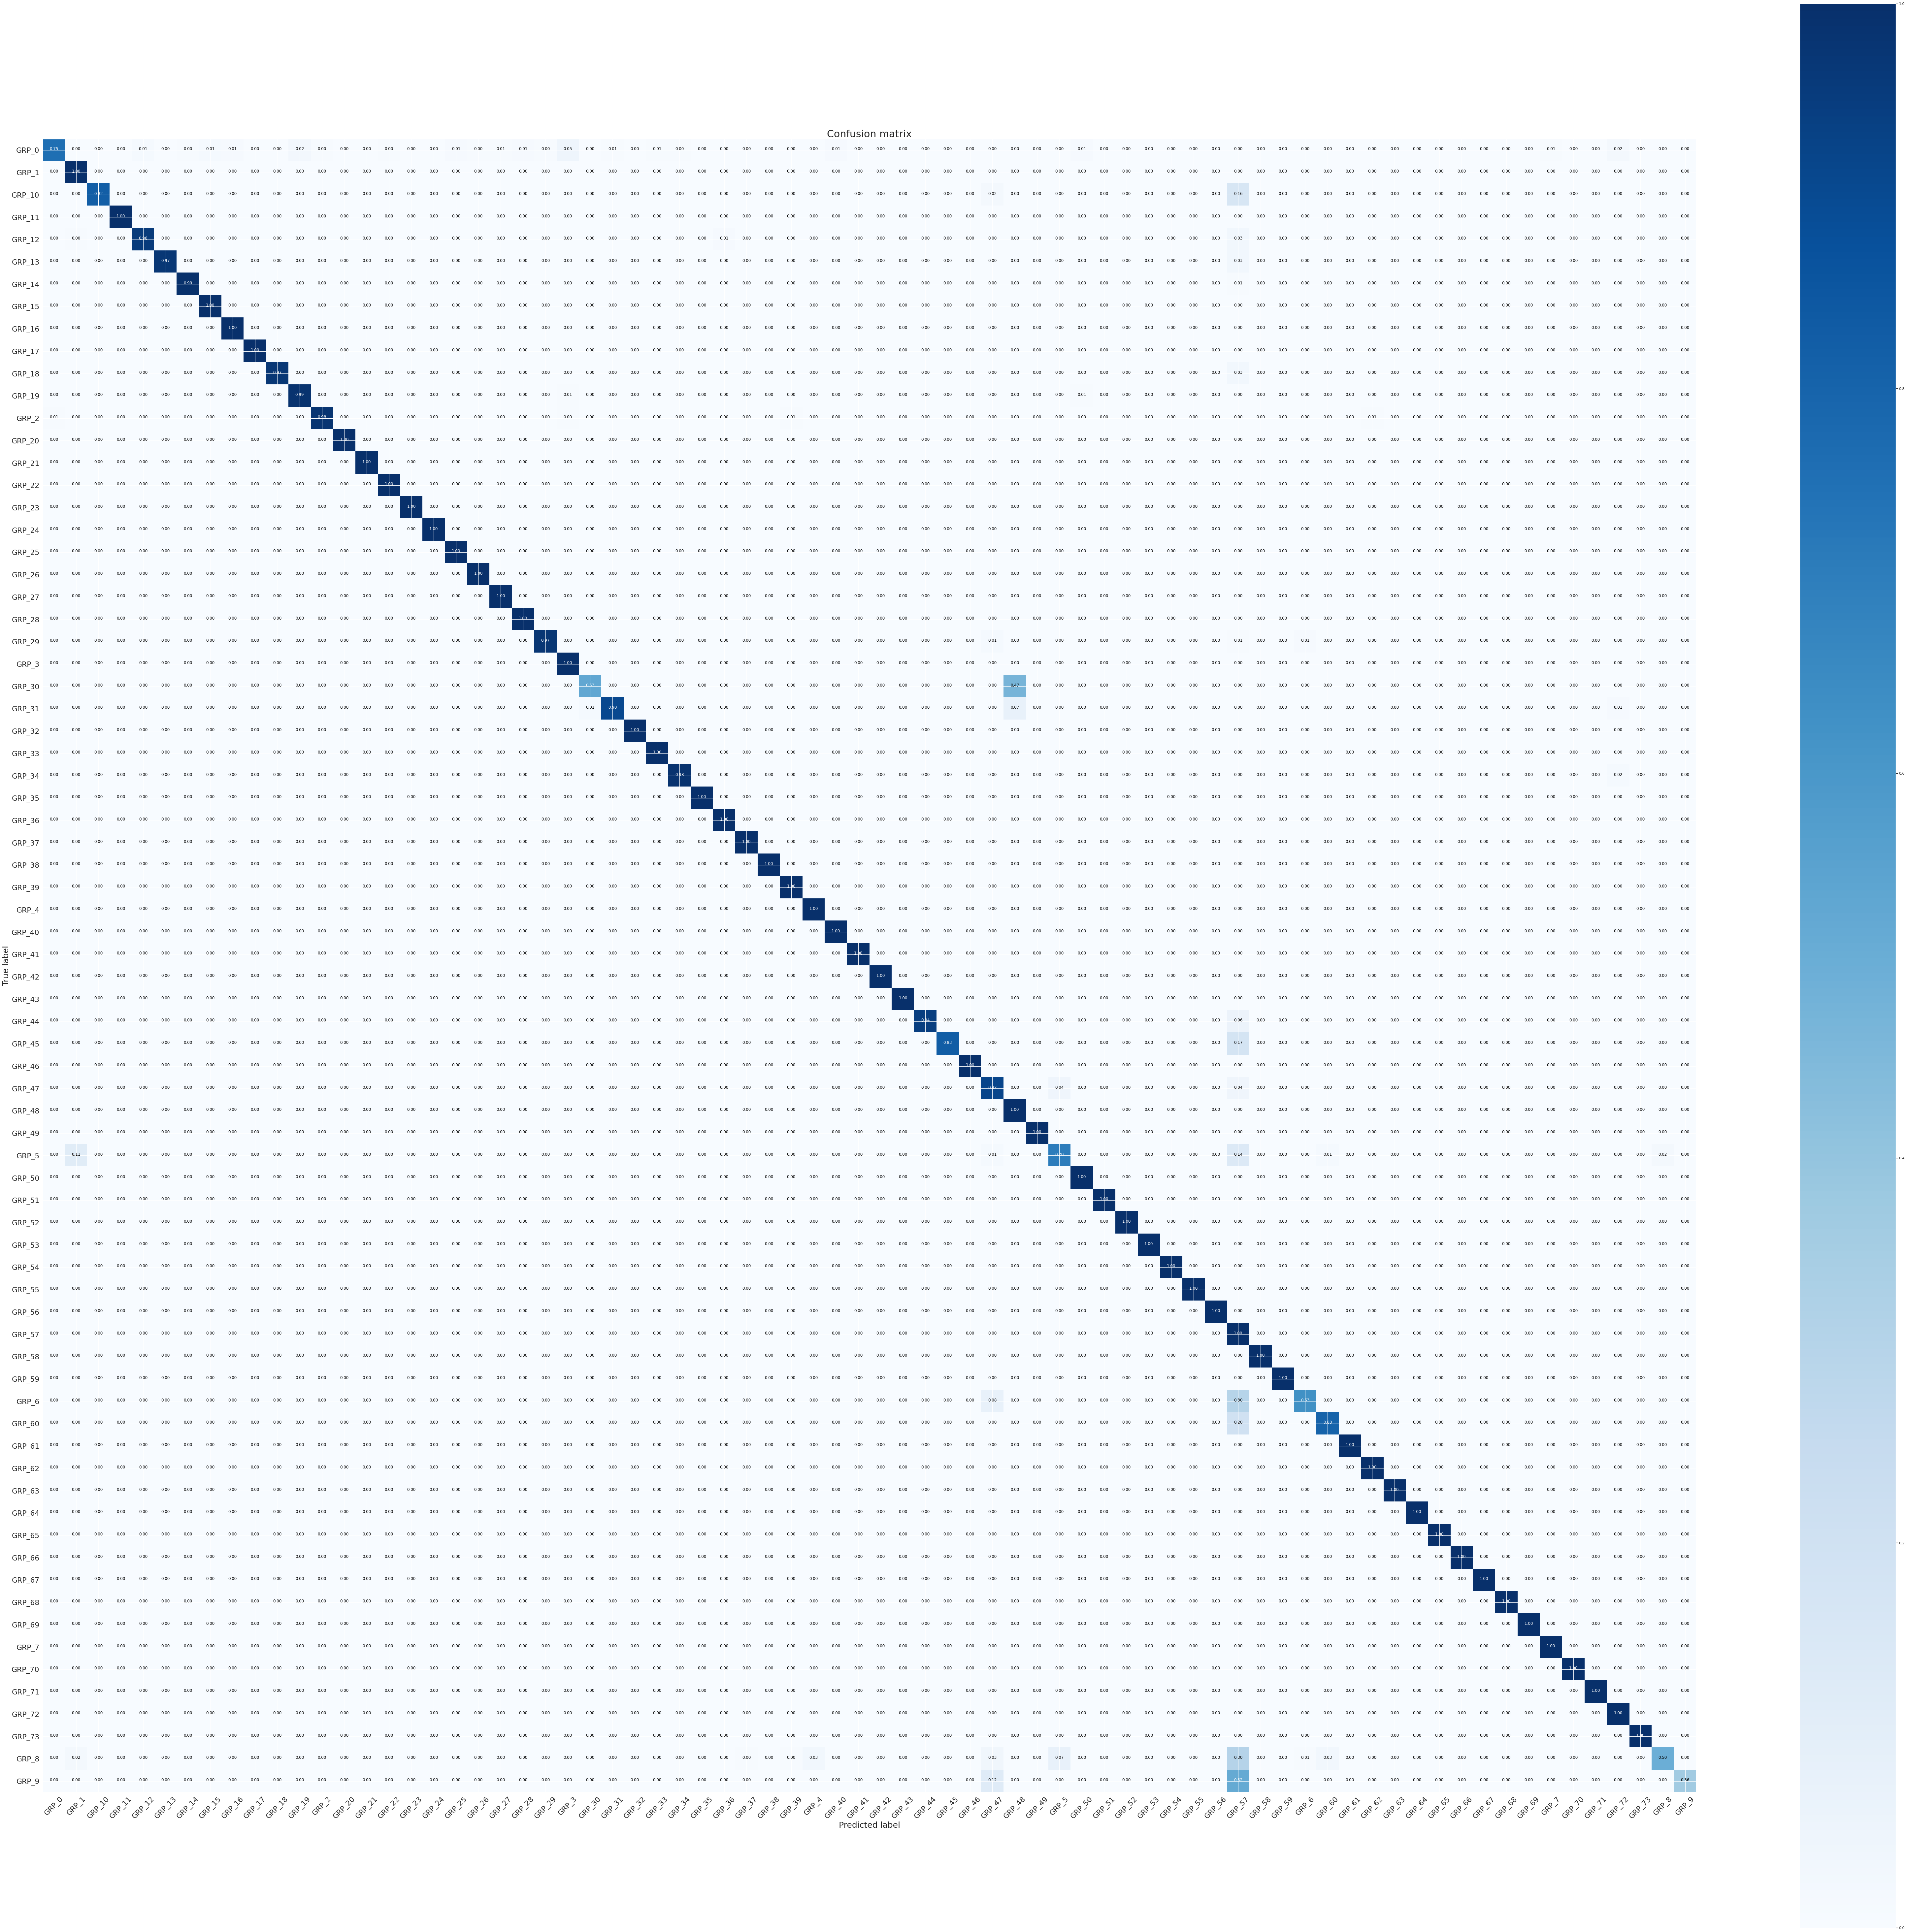

In [0]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(df_final.target.values)
text_labels = encoder.classes_ 
cnf_matrix = confusion_matrix(true_labels, predicted)
plt.figure(figsize=(100,100))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

In [0]:
X_new = ['skype error']


In [0]:
#y_new = model.predict(np.array(X_new))
# show the inputs and predicted outputs
#print("X=%s, Predicted=%s" % (X_new[0], y_new[0]))